## This notebook integrates the output from DADA2, as run on the computing cluster, and our sample data, removing blank samples, merging duplicate DNA extractions, and creating the final phyloseq object that is used in subsequent analyses and notebooks

In [1]:
# Loading required packages
library(plyr)
library(dplyr)
library(reshape)
library(ggplot2)
library(phyloseq)
library(plotly)
library(vegan)
library(ggdendro)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:plyr’:

    rename, round_any


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

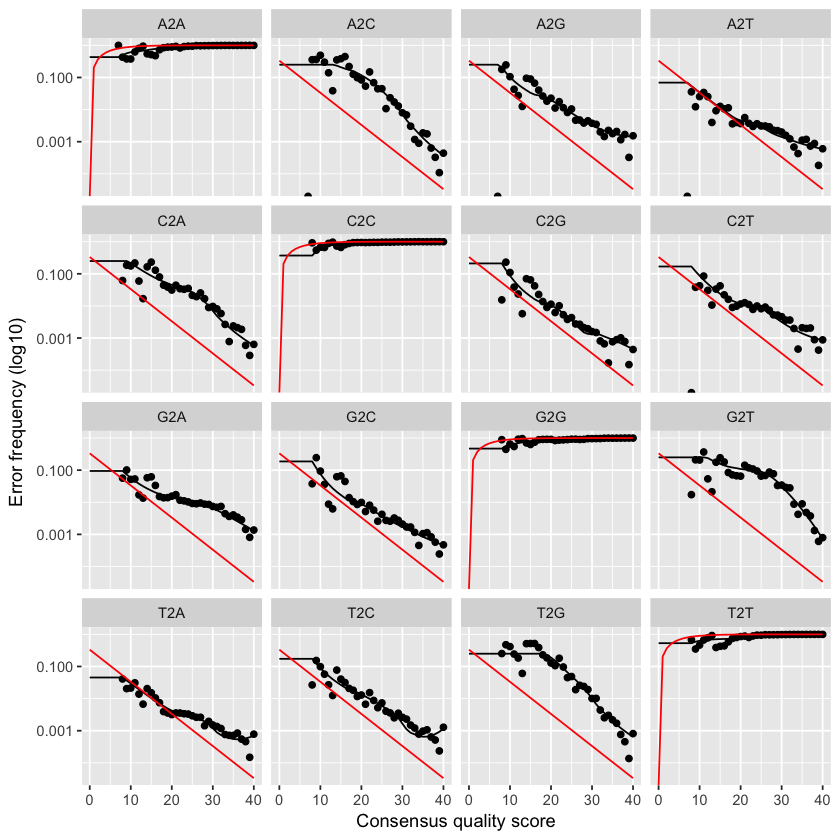

In [2]:
p = readRDS("CHTC/Dada2_Results_OA20_PEAR_Full/pErr.rds")
p
# Looking at the error graphs
# Honestly not bad, considering ITS2 dada2 pipeline might be challenging

In [3]:
Track = data.frame(readRDS("CHTC/Dada2_Results_OA20_PEAR_Full/track.rds"))
Track$FractRemain = Track$nonchim/Track$input
head(Track)
median(Track$FractRemain)
mean(Track$nonchim)
# Getting the Track of how many samples remained at each step
# Not too bad - lost ~10% in some.

,input,filtered,denoised,tabled,nonchim,FractRemain
15S-NT-19O-1,22081,21935,21935,21935,19203,0.8696617
15S-NT-19O-2,8067,7982,7982,7982,7206,0.8932689
15S-NT-20O-A-1,16582,16423,16423,16423,15158,0.9141237
15S-NT-20O-A-2,9944,9832,9832,9832,9654,0.9708367
15S-NT-20O-B-1,17020,16803,16803,16803,16696,0.9809636
15S-NT-20O-B-2,10345,10241,10241,10241,8710,0.8419526


[1] 0.9365137

[1] 12570.35

In [90]:
OTUtab = t(readRDS("CHTC/Dada2_Results_OA20_PEAR_Full/OTUtab.nochim.rds"))
OTUtab = otu_table(OTUtab, taxa_are_rows=TRUE)
#write.table(OTUtab,file="CHTC/Dada2_Results/OTUtab.txt", quote=FALSE,sep="\t",col.names=TRUE,row.names=TRUE)

In [91]:
# Get the number of OTUs
numbers = rep(1:length(row.names(OTUtab)))
# Set up for loop to append "sq" and the number
newOTUnames=numbers
for (i in numbers) {
    newOTUnames[i]=paste("sq",i,sep="")
}
# Replace the OTU table names with these new names
row.names(OTUtab) = newOTUnames

In [92]:
samdat = sample_data(read.csv("../../data/Soils_data/WBNPNWT_Soils_2015_Metadata_File_ITS.txt",sep="\t",row.names=1))
# Pulling in the sample data

In [93]:
TaxTab = read.table("CHTC/Dada2_Results_OA20_PEAR_Full/taxonomy/DADA2_seqs_ITSx.fasta.ITS2_tax_assignments.txt",sep="\t", fill=TRUE)
# Gets the taxonomy table separated into the name+size, taxonomy, and two scores.

V1split = read.table(textConnection(as.character(TaxTab$V1)), sep=";",fill=TRUE, header=FALSE)
# Split out the otu ID and count

V2split = read.table(textConnection(as.character(TaxTab$V2)), sep=";",fill=TRUE, header=FALSE)
V2splitnew=rbind(t(parse_taxonomy_greengenes(as.vector(unlist(V2split[1,])))))
for (i in 2:dim(V2split)[1]){
    V2splitnew=rbind(V2splitnew,t(parse_taxonomy_greengenes(as.vector(unlist(V2split[i,])))))
}
# Split out the taxonomy and read it as greengenes

V3split = TaxTab[,3:4]
# Pull out the match ratings

TaxTab[,1:2] = V1split
TaxTab[,3:9] = V2splitnew
TaxTab[,10:11] = V3split
colnames(TaxTab) = c("OTU","Size","Kingdom","Phylum","Class","Order","Family","Genus","Species","Qscore1","Qscore2")
TaxTabPs = TaxTab[,c(1,3:9)]
TaxTabPs = as.matrix(TaxTabPs)
row.names(TaxTabPs) = TaxTabPs[,1]
TaxTabPs = TaxTabPs[,2:8]
#TaxTabPs = tax_table(TaxTabPs)
# Putting it all together

Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonom

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included among taxonomic ranks now.”Warning message in parse_taxonomy_greengenes(as.vector(unlist(V2split[i, ]))):
“No greengenes prefixes were found. 
Consider using parse_taxonomy_default() instead if true for all OTUs. 
Dummy ranks may be included amon

In [94]:
head(TaxTabPs)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
sq285,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,
sq937,Fungi,Ascomycota,Leotiomycetes,Leotiomycetes_ord_Incertae_sedis,Myxotrichaceae,Oidiodendron,unidentified
sq1263,Unassigned,,,,,,
sq936,Fungi,Ascomycota,Sordariomycetes,Sordariales,Sordariaceae,unidentified,unidentified
sq883,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Cortinarius_diasemospermus
sq875,Fungi,Ascomycota,Sordariomycetes,Hypocreales,unidentified,unidentified,unidentified


In [95]:
## Bringing in the ITSx identities file, keeping only those that were ITS2 and UNITE-IDd

TaxToKeep = read.table("CHTC/Dada2_Results_OA20_PEAR_Full/DADA2_seqs_ITSx.fasta.extraction.results",sep="\t", fill=TRUE)
# Gets the ITSx full results file and separates out otu+count, kingdom, otehr properties
V1split = read.table(textConnection(as.character(TaxToKeep$V1)), sep=";",fill=TRUE, header=FALSE)
# Split out the otu ID and count
TaxToKeep = data.frame(OTU=V1split$V1,Count=V1split$V2,KingdomID=TaxToKeep$V3)
# Put them back as a table
TaxToKeep$KingdomID = mapvalues(TaxToKeep$KingdomID, from = levels(TaxToKeep$KingdomID), 
                                to = c("Bryophyta","Amoebozoa","Fungi","Chlorophyta",
                                       "Rhodophyta", "Marchantiophyta","Metazoa",
                                       "Raphidophyceae","Rhizaria","Synurophyceae","Tracheophyta"))
    
# Give the right names
TaxToKeep = TaxToKeep %>%
    filter(OTU %in% row.names(TaxTabPs))
# Because it seems that a few samples made it through the ITSx but not through the UNITE database

In [97]:
TaxTabPs = data.frame(TaxTabPs)
for (i in 1:dim(TaxTabPs)[1]){
        TaxTabPs$KingdomFixed[i] = ifelse(TaxTabPs$Kingdom[i] == "Unassigned",
       paste(TaxToKeep$KingdomID[TaxToKeep$OTU==row.names(TaxTabPs[i,])]),
                                          paste(TaxTabPs$Kingdom[i]))
}
TaxTabPs$Kingdom=TaxTabPs$KingdomFixed
TaxTabPs = TaxTabPs[,1:7]
TaxTabPs = tax_table(as.matrix(TaxTabPs))

In [98]:
ps = phyloseq(OTUtab,samdat,TaxTabPs)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5990 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 109 sample variables ]
tax_table()   Taxonomy Table:    [ 5990 taxa by 7 taxonomic ranks ]

In [99]:
ps = subset_taxa(ps, Kingdom!="Tracheophyta")
ps
# Remove any vascular plants

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5938 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 109 sample variables ]
tax_table()   Taxonomy Table:    [ 5938 taxa by 7 taxonomic ranks ]

[1] 2753918

[1] 0

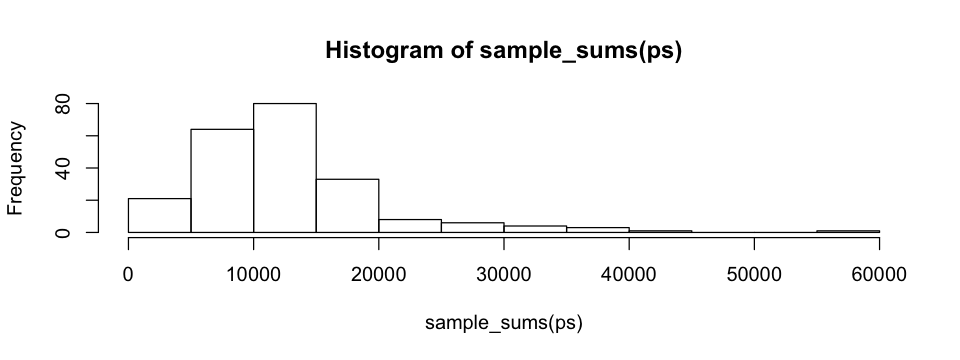

In [100]:
options(repr.plot.width=8, repr.plot.height=3)
sum(sample_sums(ps))
min(sample_sums(ps))
hist(sample_sums(ps), breaks=20)

In [101]:
sample_names(ps)=sample_data(ps)$Sample_Name
# There was a naming issue from the Biotech centre
sort(sample_sums(ps))
# Check the sample counts

Blank-8   15S-NT-44O-1   15S-NT-44M-1       Blank-13       Blank-11 
             0              1              1              1              3 
      Blank-22       Blank-16       Blank-17        Blank-1        Blank-6 
             9             25             51             66            148 
       Blank-3   15S-NT-49M-2  15S-NT-U09M-1   15S-NT-51O-2   15S-NT-50O-2 
           188            537            585            732            896 
  15S-NT-50O-1   15S-NT-35O-1  15S-NT-U08O-2  15S-WB-U05O-1   15S-NT-39O-2 
          1254           3306           4355           4707           4895 
 15S-WB-U01O-1  15S-WB-U01M-1   15S-NT-51O-1  15S-WB-U03M-2   15S-NT-25O-2 
          4965           5115           5215           5279           5357 
  15S-NT-42O-2  15S-WB-U05O-2   15S-NT-34M-2   15S-NT-40M-2  15S-WB-U01M-2 
          5447           5568           5610           5737           5879 
  15S-NT-49O-1  15S-WB-U05M-2   15S-WB-12M-1  15S-WB-U05M-1   15S-NT-47M-1 
          6169           6233           6375           6546           6557 
15S-NT-20O-A-2   15S-NT-52O-2   15S-NT-42M-1   15S-NT-52O-1   15S-NT-42O-1 
          6681           6881           6980           7083           7104 
  15S-WB-18M-1 15S-NT-20O-B-2 15S-NT-20O-B-1   15S-NT-40O-1   15S-NT-21O-1 
          7197           7303           7411           7423           7431 
15S-NT-31O-B-2   15S-WB-16O-1  15S-NT-U10M-2   15S-NT-24M-1   15S-WB-16O-2 
          7450           7468           7629           7704           7791 
  15S-WB-12M-2   15S-NT-31M-2   15S-WB-16M-1   15S-NT-34O-1   15S-NT-26O-1 
          7806           7812           7911           7968           8007 
  15S-NT-40M-1   15S-WB-15O-2  15S-WB-U04M-2   15S-NT-46M-1  15S-WB-U04O-1 
          8104           8260           8261           8302           8411 
15S-NT-20O-A-1  15S-NT-U11O-1  15S-NT-U10M-1   15S-WB-15O-1   15S-NT-49O-2 
          8496           8526           8531           8552           8599 
  15S-NT-27O-2   15S-NT-43M-1   15S-NT-39M-2  15S-WB-U03O-2   15S-NT-39M-1 
          8648           8652           8653           8681           8727 
  15S-NT-46M-2   15S-NT-47O-2   15S-NT-27O-1  15S-NT-U08M-1   15S-NT-41M-2 
          8762           8774           8777           8917           8952 
  15S-WB-10O-1 15S-NT-31O-A-1   15S-NT-21O-2  15S-NT-U12O-2   15S-WB-08M-2 
          9022           9030           9081           9086           9191 
  15S-NT-30M-2   15S-NT-19O-1   15S-WB-14M-1   15S-NT-31M-1   15S-NT-43M-2 
          9396           9591           9631           9747           9776 
  15S-WB-13O-1   15S-NT-42M-2  15S-NT-U08O-1   15S-WB-13O-2   15S-NT-21M-2 
         10073          10088          10122          10142          10331 
  15S-WB-08O-2   15S-NT-30M-1  15S-NT-U10O-1   15S-WB-12O-1   15S-NT-36O-2 
         10343          10481          10486          10577          10594 
 15S-WB-U04M-1   15S-WB-07O-1   15S-NT-41M-1  15S-NT-U11O-2  15S-NT-U07O-2 
         10639          10651          10679          10703          10784 
  15S-WB-17M-1   15S-NT-22O-1  15S-NT-U06O-1  15S-NT-U09O-2   15S-NT-25O-1 
         10935          11018          11067          11250          11285 
  15S-WB-14M-2  15S-NT-U07M-2   15S-NT-41O-2   15S-WB-07M-2   15S-NT-44O-2 
         11369          11387          11428          11466          11472 
 15S-NT-U08M-2   15S-NT-47M-2   15S-WB-06O-2   15S-NT-23M-1  15S-NT-U07O-1 
         11500          11612          11648          11673          11686 
  15S-NT-36O-1   15S-WB-02O-2   15S-NT-32O-2  15S-WB-U04O-2   15S-NT-26O-2 
         11702          11765          11882          12007          12110 
  15S-WB-11O-1   15S-NT-40O-2   15S-WB-05O-2  15S-WB-U02O-2   15S-NT-24O-2 
         12209          12377          12459          12574          12608 
15S-WB-09O-1-R   15S-WB-07O-2   15S-WB-15M-2   15S-NT-24O-1   15S-WB-17M-2 
         12616          12746          12754          12881          12978 
  15S-NT-38M-1   15S-WB-10M-2   15S-NT-33O-2   15S-NT-2

In [102]:
ps.merged = merge_samples(ps, "Sample_ID")
# Merging the in-lab DNA extraction samples
# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.

names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

# Renaming it all
ps=ps.merged

In [103]:
sort(sample_sums(ps))
# Chck sums of new samples
# Blanks look nice.

Blank-8    Blank-13    Blank-11    Blank-22    Blank-16    Blank-17 
          0           1           3           9          25          51 
    Blank-1     Blank-6     Blank-3 15S-WB-U05O 15S-WB-U01M  15S-NT-42O 
         66         148         188       10275       10994       12551 
15S-WB-U05M  15S-NT-40M  15S-NT-52O  15S-WB-12M 15S-NT-U08O  15S-NT-49O 
      12779       13841       13964       14181       14477       14768 
 15S-WB-16O 15S-NT-U10M  15S-NT-21O  15S-NT-25O  15S-WB-15O  15S-NT-46M 
      15259       16160       16512       16642       16812       17064 
 15S-NT-42M  15S-NT-39M  15S-NT-27O  15S-NT-31M  15S-NT-47M  15S-NT-43M 
      17068       17380       17425       17559       18169       18428 
15S-WB-U04M 15S-NT-U11O  15S-NT-41M  15S-NT-40O  15S-NT-30M  15S-NT-34M 
      18900       19229       19631       19800       19877       20099 
 15S-NT-26O  15S-WB-13O 15S-NT-U08M 15S-WB-U04O  15S-WB-14M  15S-NT-35O 
      20117       20215       20417       20418       21000       21030 
 15S-NT-34O  15S-NT-36O  15S-WB-18M  15S-WB-08M 15S-NT-U07O 15S-WB-U03O 
      21912       22296       22344       22455       22470       22782 
 15S-WB-07O  15S-WB-12O  15S-WB-17M 15S-NT-U10O 15S-NT-U12O  15S-NT-22O 
      23397       23727       23913       23943       23977       24131 
 15S-WB-10O  15S-WB-06O  15S-NT-24M  15S-WB-16M 15S-WB-U01O  15S-NT-23M 
      24197       24835       24935       24966       25013       25308 
 15S-WB-08O 15S-NT-U09O  15S-NT-24O 15S-WB-U03M 15S-NT-U07M  15S-NT-19O 
      25444       25476       25489       25660       25972       26144 
 15S-NT-32O 15S-NT-U06O  15S-NT-47O  15S-WB-10M  15S-WB-07M 15S-WB-U02O 
      26279       26693       26786       26930       27017       27212 
 15S-WB-15M  15S-NT-21M  15S-NT-23O  15S-WB-09M  15S-NT-20O  15S-NT-38O 
      27389       27714       29355       29472       29891       30016 
 15S-NT-39O  15S-NT-29O  15S-NT-27M  15S-NT-22M  15S-NT-38M  15S-WB-11O 
      30162       30278       30298       30317       30381       30407 
 15S-WB-11M  15S-WB-05O  15S-NT-41O  15S-WB-06M  15S-WB-02O  15S-WB-09O 
      30576       30967       31219       31549       31732       31899 
 15S-NT-33O  15S-NT-44M  15S-NT-28O  15S-WB-17O  15S-WB-05M  15S-NT-33M 
      32065       32125       32254       32313       36341       36896 
 15S-WB-14O  15S-NT-28M  15S-NT-30O  15S-NT-45O  15S-NT-31O  15S-NT-44O 
      37473       42946       42997       43221       45370       46729 
 15S-WB-01O  15S-NT-51O  15S-WB-01M 15S-NT-U09M  15S-WB-04M  15S-NT-48O 
      47807       47864       47953       48301       52155       53154 
 15S-NT-49M  15S-NT-50O 
      57727       89370

## Setting up the correct sample data metadata

In [104]:
# Importing the dataset
FactorTable = read.csv("../../data/Soils_data/SamDat.txt",sep="\t",header=TRUE)
# Importing a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to

FactorTable = FactorTable[(FactorTable$Factors %in% colnames(sample_data(ps))),]

In [105]:
for (i in colnames(sample_data(ps))[colnames(sample_data(ps)) %in%  FactorTable$Factors ]) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps)[,i] = as.numeric(paste(data.frame(sample_data(ps.merged)[,i])[,1]))
        }
    }
# No real need to do this for full ps, as won't really be doing stats on raw data

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

In [106]:
sample_data(ps)$Severity_Class = factor(sample_data(ps)$Severity_Class, c("Unburned","Low","Moderate","High"))

### Adding FunGuilds taxonomy

In [107]:
# Grabbing the taxonomy
ps.tax = tax_table(ps)
OTU_ID = data.frame(OTU_ID=rownames(ps.tax))
Taxonomy = data.frame(Taxonomy=paste(ps.tax[,1],ps.tax[,2],ps.tax[,3],ps.tax[,4],ps.tax[,5],ps.tax[,6],ps.tax[,7], sep=";"))

In [108]:
Funguild = data.frame(OTU_ID,Taxonomy)
Funguild = data.frame(matrix(unlist(Funguild), ncol=2, byrow=F),stringsAsFactors=FALSE)
colnames(Funguild) = c("OTU_ID","taxonomy")
dim(Funguild)
#write.table(Funguild, file = "CHTC/Dada2_Results_OA20_PEAR_Full/Funguild.txt",quote=FALSE,sep = "\t",row.names=FALSE)

[1] 5938    2

In [32]:
# Run in Python or terminal
#!python ../../../Databases/Funguilds.py -otu CHTC/Dada2_Results_OA20_PEAR_Full/Funguild.txt -db fungi

In [109]:
# Import results from Funguilds
Funguilds.guilds = (read.table("CHTC/Dada2_Results_OA20_PEAR_Full/Funguild.guilds.txt",sep="\t",header=TRUE))
Funguilds.guilds = Funguilds.guilds[,c(1,3:7,9,10,11)]
head(Funguilds.guilds)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”

OTU_ID,Taxon,Taxon.Level,Trophic.Mode,Guild,Growth.Morphology,Confidence.Ranking,Notes,Citation.Source
sq1,Eurotiales,7,Saprotroph,Undefined Saprotroph,Microfungus,Possible,NULL,"Sterkenburg E, et al. 2015. New Phytologist 207:1145-1158"
sq10,Phoma,13,Pathotroph-Saprotroph,Plant Pathogen-Wood Saprotroph,NULL,Highly Probable,NULL,"Seehann G, et al. 1975. List of Fungi in Soft-Rot Tissue Tests. Institute fur Holzbiologie und Holzschutz, Bundesforschungsanstalt fur Forst - und Holzwirtshaft, Hamburg - Lohbrugge, Germany; Costa IPMW, et al. 2012. Mycotaxon 119:26; Tedersoo L, et al. 2014. Science 346:1256688"
sq100,Eurotiales,7,Saprotroph,Undefined Saprotroph,Microfungus,Possible,NULL,"Sterkenburg E, et al. 2015. New Phytologist 207:1145-1158"
sq1003,Cenococcum,13,Symbiotroph,Ectomycorrhizal,NULL,Highly Probable,NULL,"Tedersoo L, et al. 2014. Science 346:1256688"
sq1005,Russula,13,Symbiotroph,Ectomycorrhizal,Agaricoid,Highly Probable,NULL,"Rinaldi AC, et al. 2008. Fungal Diversity 33:1-45; Tedersoo L, et al. 2010. Mycorrhiza 20:217-263; http://mycorrhizas.info/ecmf.html"
sq1007,Cenococcum,13,Symbiotroph,Ectomycorrhizal,NULL,Highly Probable,NULL,"Tedersoo L, et al. 2014. Science 346:1256688"


In [110]:
# Set row names to match OTU ID
row.names(Funguilds.guilds) = Funguilds.guilds$OTU_ID

In [111]:
# What fraction of OTUs got a match?

Funguilds.taxa = Funguilds.guilds$OTU_ID
sum(taxa_names(ps) %in% Funguilds.taxa)/sum(taxa_names(ps) %in% taxa_names(ps))
# Classified 32% of the community members... not amazing, but ok

[1] 0.3192994

In [112]:
MergedTaxTable = merge(tax_table(ps),Funguilds.guilds,by="row.names",all.x=TRUE)
row.names(MergedTaxTable) = MergedTaxTable$Row.names
MergedTaxTable = MergedTaxTable[,2:dim(MergedTaxTable)[2]]
MergedTaxTable = as.matrix(MergedTaxTable)
tax_table(ps) = tax_table(MergedTaxTable)

## Pruning low-abundance samples

In [113]:
cutoff = 500

# Blanks are very low; can be removed

ps.rare = prune_samples(sample_sums(ps)<cutoff, ps)
sample_sums(ps.rare)

Blank-1 Blank-11 Blank-13 Blank-16 Blank-17 Blank-22  Blank-3  Blank-6 
      66        3        1       25       51        9      188      148 
 Blank-8 
       0

In [114]:
cutoff = 500
ps = prune_samples(sample_sums(ps)>=cutoff, ps)
# This results in no blanks remaining.

In [40]:
# This is our final ps object
#saveRDS(ps,file="CHTC/Dada2_Results_OA20_PEAR_Full/ps.fungi")

In [115]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5938 taxa and 101 samples ]
sample_data() Sample Data:       [ 101 samples by 103 sample variables ]
tax_table()   Taxonomy Table:    [ 5938 taxa by 16 taxonomic ranks ]